## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import keras
from scipy.misc import imsave
import matplotlib.image as mpimg
from cv2 import bitwise_and
from PIL import Image
import cv2
import pandas as pd
from PIL import Image
from IPython.display import Image
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageChops, ImageFilter
import glob
import keras as k
import os
from PIL import Image, ImageOps
import numpy as np
from scipy.misc import imresize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import scipy.misc
from random import randint
import shutil

Using TensorFlow backend.


In [3]:
src = './data/im/'
train_dest = './data/train'
valid_dest = './data/val'
sub_dest = './data/submission'
def copy_valid(y,X,src,dest):
    for i in range(600, X.shape[0]):
        image = X[i]
        if (y[i]==0):
            destination = dest + '/benign'
        else:
            destination = dest + '/malignant'
        file = src + str(image) + '.jpg'
        shutil.copy(file,destination)
def copy_train(y,X,src,dest):
    for i in range(0, 600):
        image = X[i]
        if (y[i]==0):
            destination = dest + '/benign'
        else:
            destination = dest + '/malignant'
        file = src + str(image) + '.jpg'
        shutil.copy(file,destination)
def copy_submission(y,X,src,dest):
    for i in range(0, X.shape[0]):
        image = X[i]
        if (y[i]==0):
            destination = dest + '/benign'
        else:
            destination = dest + '/malignant'
        file = src + str(image) + '.jpg'
        shutil.copy(file,destination)

In [7]:
copy_submission(y,df_submission['ImageId'].values,src,sub_dest)
copy_train(y,X,src,train_dest)
copy_valid(y,X,src,valid_dest)

0
1
2


## **Upload data**

In [3]:
df = pd.read_csv('data/train.csv')
X_df = df['ImageId']
y_df = df['Malignant']
X = X_df.values
y = y_df.values

In [44]:
folder = 'data'
image = X[5]
im = cv2.imread(folder + '/im/'  + str(image) + '.jpg')

In [45]:
hsv = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)

In [46]:
equ = cv2.equalizeHist(hsv[:,:,2])

In [47]:
hsv[:,:,2] = equ

In [48]:
rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

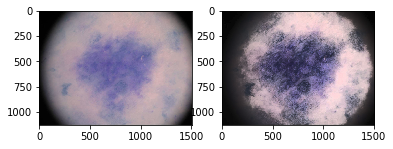

In [49]:
plt.subplot(1,2,1)
plt.imshow(im)
plt.subplot(1,2,2)
plt.imshow(rgb)
plt.show()

## Create matrix of images

In [48]:
image = X[0]
img = plt.imread('data' + '/im/'  + str(image) + '.jpg')
mask = plt.imread('data' + '/im_segmentations/'  + str(image) + '_segmentation.jpg') 
img.max()

223

In [51]:
def build_matrix(X,folder):
    # load images
    M = []
    for i in range(0, X.shape[0]):
        image = X[i]
        im = plt.imread(folder + '/im/'  + str(image) + '.jpg')/255
        mask = plt.imread(folder + '/im_segmentations/'  + str(image) + '_segmentation.jpg')/255 
        #upload segmentaion and resize (image*image_seg) after applying the mask
        #link = 'data/scaled' + '/'  + str(image) + '_segmentation.jpg'
        img = im* np.stack([mask,mask,mask],axis=-1)
        img_down = resize(img,(224,224), mode='reflect',anti_aliasing = True) 
        plt.imsave('./data/croped/' + image+'.jpg',img_down)
        #M.append(img_down)

In [52]:
#Create training matrix
M = build_matrix(X,folder='data')

In [8]:
#saving the matrix
np.save('data/trainig_segm', M)

In [ ]:
#load input matrix
M = np.load('data/trainig_images.npy')

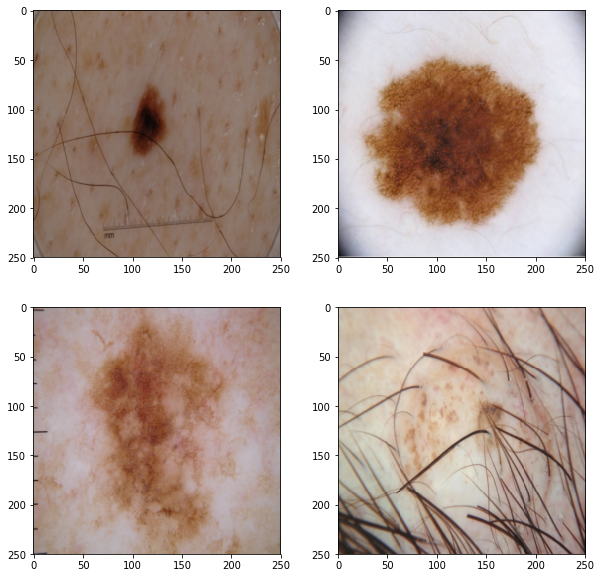

In [33]:
#first four images
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(2,2,1)
plt.imshow(M[0])
plt.subplot(2,2,2)
plt.imshow(M[1])
plt.subplot(2,2,3)
plt.imshow(M[2])
plt.subplot(2,2,4)
plt.imshow(M[3])

## Data Augmentation

In [13]:
datagen  = keras.preprocessing.image.ImageDataGenerator(rotation_range=270, width_shift_range=0.2,
                                             height_shift_range=0.2,horizontal_flip=True)

## Model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(250, 250, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [20]:
model.fit_generator(
        datagen.flow(M, y, batch_size=32),
        epochs=50,
        steps_per_epoch=len(M) / 32
  )


Epoch 1/50
22/21 [==============================] - 67s 3s/step - loss: 0.8610 - acc: 0.5402
Epoch 2/50
22/21 [==============================] - 65s 3s/step - loss: 0.6806 - acc: 0.5915
Epoch 3/50
22/21 [==============================] - 64s 3s/step - loss: 0.6888 - acc: 0.5801
Epoch 4/50
22/21 [==============================] - 65s 3s/step - loss: 0.6867 - acc: 0.5938
Epoch 5/50
22/21 [==============================] - 65s 3s/step - loss: 0.6707 - acc: 0.5858
Epoch 6/50
22/21 [==============================] - 65s 3s/step - loss: 0.6730 - acc: 0.5988
Epoch 7/50
22/21 [==============================] - 65s 3s/step - loss: 0.7169 - acc: 0.5972
Epoch 8/50
22/21 [==============================] - 65s 3s/step - loss: 0.6625 - acc: 0.5945
Epoch 9/50
22/21 [==============================] - 65s 3s/step - loss: 0.6751 - acc: 0.6073
Epoch 10/50
22/21 [==============================] - 64s 3s/step - loss: 0.6564 - acc: 0.5860
Epoch 11/50
22/21 [==============================] - 65s 3s/step - lo

# Second Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.utils import np_utils
from keras import optimizers

In [5]:
model = Sequential()
model.add(ZeroPadding2D((1, 1), input_shape=(250, 250,3)))    
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(64, 3, 3, activation='relu', name='conv1_2'))
model.add(MaxPooling2D((2, 2), dim_ordering="th", strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(128, 3, 3, activation='relu', name='conv2_2'))
model.add(MaxPooling2D((2, 2),  dim_ordering="th",  strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(256, 3, 3, activation='relu', name='conv3_3'))
model.add(MaxPooling2D((2, 2), dim_ordering="th", strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv4_3'))
model.add(MaxPooling2D((2, 2),  dim_ordering="th",  strides=(2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Convolution2D(512, 3, 3, activation='relu', name='conv5_3'))
model.add(MaxPooling2D((2, 2), dim_ordering="th",  strides=(2, 2)))


model.add(Flatten(input_shape=trainX[0].shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9),
                  metrics=['accuracy'])

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_1")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", name="conv1_2")`
  """
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D((2, 2), strides=(2, 2), data_format="channels_first")`
  
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", name="conv2_1")`
  if __name__ == '__main__':
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_

NameError: name 'trainX' is not defined

In [ ]:
training_1 = model.fit(M, y, batch_size=32, nb_epoch=10)

## Creating output

In [8]:
#load output matrix
sub = np.load('data/data_testing_matrix.npy')

In [53]:
df_submission = pd.read_csv('data/test.csv')

In [54]:
#buildong output matrix
sub = build_matrix(df_submission['ImageId'].values,folder='data')
#saving the matrix
#np.save('data/data_testing_matrix', M)

In [21]:
rslt = model.predict(sub)

In [23]:
m=np.mean(rslt)
for i in range(0,rslt.shape[0]):
    if rslt[i]>m:
        rslt[i]=1
    else:
        rslt[i]=0

In [24]:
rslt

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],

In [30]:
i=0
for Id in df_submission['ImageId']:
    value = rslt[i] 
    df_submission.loc[df_submission['ImageId'] == Id, 'Malignant'] = value
    i=i+1
    
    
df_submission['Malignant'] = df_submission['Malignant'].astype(int) # This line is mandatory to be sure to have integer
print(df_submission.head(3))
df_submission.to_csv('data/vendredit.csv', index=None, sep=',', mode='w')

     ImageId  Malignant
0  IM_000788          1
1  IM_000640          0
2  IM_000889          0


In [16]:

from keras import layers
from keras import models


#
# image dimensions
#

img_height = 250
img_width = 250
img_channels = 3

#
# network params
#

cardinality = 32


def residual_network(x):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:
        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y

    # conv1
    x = layers.Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(3):
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 128, 256, _project_shortcut=project_shortcut)

    # conv3
    for i in range(4):
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256, 512, _strides=strides)

    # conv4
    for i in range(6):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512, 1024, _strides=strides)

    # conv5
    for i in range(3):
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 1024, 2048, _strides=strides)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1)(x)

    return x


image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = residual_network(image_tensor)
  
model = models.Model(inputs=[image_tensor], outputs=[network_output])